### 1. Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

abspath = '/home/piclick/data/deepfashion/Attribute/'

In [2]:
l = []
with open(abspath + 'Anno/list_bbox.txt') as f:
    f.readline()
    for line in f:
        line = line.split()
        l.append(line)

### 3. df 형태로 파일 읽기

In [3]:
df = pd.DataFrame(l)
df = df.drop(0)
df.head()

,0,1,2,3,4
1,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,072,079,232,273
2,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,067,059,155,161
3,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,065,065,156,200
4,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,051,062,167,182
5,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,046,088,166,262


컬럼명 가독성 좋게 수정하기 (x1, y1은 왼쪽 상단 좌표 / x2, y2는 오른쪽 하단 좌표값)

In [4]:
df.columns = ['img_path','x1','y1','x2','y2']
df.head()

,img_path,x1,y1,x2,y2
1,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,072,079,232,273
2,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,067,059,155,161
3,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,065,065,156,200
4,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,051,062,167,182
5,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,046,088,166,262


### 4. 카테고리 파일 불러오기

In [5]:
cate_img = {}
with open(abspath+'Anno/list_category_img.txt') as f:
    f.readline()
    f.readline()
    for line in f:
        c, n = line.split()
        cate_img[c] = n

In [6]:
dict_img = {}
for v in cate_img.values():
    if not v in dict_img: dict_img[v]=1
    else: dict_img[v]+=1

In [7]:
print(dict_img)

{'3': 24557, '2': 7495, '5': 330, '4': 309, '1': 160, '18': 36887, '17': 15429, '19': 10078, '16': 13123, '7': 324, '10': 4048, '6': 13311, '11': 10467, '9': 716, '15': 791, '12': 748, '20': 146, '13': 676, '14': 97, '8': 17, '33': 14773, '32': 19666, '26': 7076, '29': 4416, '34': 3048, '27': 594, '24': 1669, '35': 1106, '30': 5013, '23': 486, '22': 527, '36': 386, '31': 32, '25': 49, '28': 45, '21': 77, '41': 72158, '48': 7408, '39': 2120, '44': 2294, '42': 6153, '47': 150, '37': 54, '43': 126, '40': 17, '46': 70}


In [8]:
cate = {}
with open(abspath+'Anno/list_category_cloth.txt') as f:
    f.readline()
    f.readline()
    for line in f:
        c, n = line.split()
        cate[c] = n

In [9]:
print('총 아이템의 갯수는',len(cate),'개')
print(cate.items())

총 아이템의 갯수는 50 개
dict_items([('Anorak', '1'), ('Blazer', '1'), ('Blouse', '1'), ('Bomber', '1'), ('Button-Down', '1'), ('Cardigan', '1'), ('Flannel', '1'), ('Halter', '1'), ('Henley', '1'), ('Hoodie', '1'), ('Jacket', '1'), ('Jersey', '1'), ('Parka', '1'), ('Peacoat', '1'), ('Poncho', '1'), ('Sweater', '1'), ('Tank', '1'), ('Tee', '1'), ('Top', '1'), ('Turtleneck', '1'), ('Capris', '2'), ('Chinos', '2'), ('Culottes', '2'), ('Cutoffs', '2'), ('Gauchos', '2'), ('Jeans', '2'), ('Jeggings', '2'), ('Jodhpurs', '2'), ('Joggers', '2'), ('Leggings', '2'), ('Sarong', '2'), ('Shorts', '2'), ('Skirt', '2'), ('Sweatpants', '2'), ('Sweatshorts', '2'), ('Trunks', '2'), ('Caftan', '3'), ('Cape', '3'), ('Coat', '3'), ('Coverup', '3'), ('Dress', '3'), ('Jumpsuit', '3'), ('Kaftan', '3'), ('Kimono', '3'), ('Nightdress', '3'), ('Onesie', '3'), ('Robe', '3'), ('Romper', '3'), ('Shirtdress', '3'), ('Sundress', '3')])


In [10]:
# Customize label
s = '1 1 2 1 2 1 2 2 2 2 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 1 1 4 4 4 4 4 4 4 4 4 4 4'
new_category = s.split()
len(new_category)

50

In [11]:
for i,k in enumerate(cate.keys()):
    cate[k] = int(new_category[i]) - 1

In [12]:
cate # 0 : outer, 1 : Top, 2: Bottom, 3:Onepiece

{'Anorak': 0,
 'Blazer': 0,
 'Blouse': 1,
 'Bomber': 0,
 'Button-Down': 1,
 'Caftan': 3,
 'Cape': 0,
 'Capris': 2,
 'Cardigan': 0,
 'Chinos': 2,
 'Coat': 0,
 'Coverup': 3,
 'Culottes': 2,
 'Cutoffs': 2,
 'Dress': 3,
 'Flannel': 1,
 'Gauchos': 2,
 'Halter': 1,
 'Henley': 1,
 'Hoodie': 1,
 'Jacket': 0,
 'Jeans': 2,
 'Jeggings': 2,
 'Jersey': 0,
 'Jodhpurs': 2,
 'Joggers': 2,
 'Jumpsuit': 3,
 'Kaftan': 3,
 'Kimono': 3,
 'Leggings': 2,
 'Nightdress': 3,
 'Onesie': 3,
 'Parka': 0,
 'Peacoat': 0,
 'Poncho': 0,
 'Robe': 3,
 'Romper': 3,
 'Sarong': 2,
 'Shirtdress': 3,
 'Shorts': 2,
 'Skirt': 2,
 'Sundress': 3,
 'Sweater': 1,
 'Sweatpants': 2,
 'Sweatshorts': 2,
 'Tank': 1,
 'Tee': 1,
 'Top': 1,
 'Trunks': 2,
 'Turtleneck': 1}

### 5. 이미지 이름에서 아이템의 이름을 찾아 라벨 할당

In [13]:
value = []

for img_name in df['img_path']:
    for idx in cate:
        if idx in img_name:
            value.append(int(cate[idx]))
            break
        else:
            continue

In [14]:
len(value)

289222

### 6. 새로 생성한 라벨 리스트 df에 추가 & 컬럼위치 변경

In [15]:
#리스트를 df에 추가하기

df['label'] = value

In [16]:
df2 = df

In [17]:
#칼럼 순서 변경
df2 = df2[['img_path','label','x1','y1','x2','y2']]
df2.head()

,img_path,label,x1,y1,x2,y2
1,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,1,072,079,232,273
2,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,1,067,059,155,161
3,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,1,065,065,156,200
4,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,1,051,062,167,182
5,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,1,046,088,166,262


### 이미지의 width, height 칼럼에 추가하기

In [18]:
width = []
height = []

for img_name in df2['img_path']:
    img = Image.open(os.path.join(abspath,img_name))
    w,h = img.size
    width.append(w)
    height.append(h)

In [19]:
df2['width'] = width
df2['height'] = height

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df2 = df2.astype({'x1':'int64','y1':'int64','x2':'int64','y2':'int64'})
df2 = df2[['img_path','width','height','label','x1','y1','x2','y2']]
df2.head()

,img_path,width,height,label,x1,y1,x2,y2
1,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,300,300,1,72,79,232,273
2,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,205,300,1,67,59,155,161
3,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,207,300,1,65,65,156,200
4,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,200,250,1,51,62,167,182
5,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,200,300,1,46,88,166,262


In [21]:
#df2['x1_norm'] = df2['x1'] / df2['width']
#df2['y1_norm'] = df2['y1'] / df2['height']
#df2['x3_norm'] = df2['x2'] / df2['width']
#df2['y3_norm'] = df2['y2'] / df2['height']

df2['cx_norm'] = round(((df2['x2'] - df2['x1']) /2 + df2['x1']) / df2['width'],6) 
df2['cy_norm'] = round(((df2['y2'] - df2['y1']) /2 + df2['y1']) / df2['height'],6)  
df2['box_width_norm'] = round((df2['x2'] - df2['x1']) / df2['width'],6)
df2['box_height_norm'] = round((df2['y2'] - df2['y1']) / df2['height'],6)

In [23]:
df2 = df2[['img_path','label','cx_norm','cy_norm','box_width_norm','box_height_norm']]
df2.head()

,img_path,label,cx_norm,cy_norm,box_width_norm,box_height_norm
1,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,1,0.506667,0.586667,0.533333,0.646667
2,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,1,0.541463,0.366667,0.429268,0.340000
3,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,1,0.533816,0.441667,0.439614,0.450000
4,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,1,0.545000,0.488000,0.580000,0.480000
5,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,1,0.530000,0.583333,0.600000,0.580000


### dataframe txt로 저장하기 & 불러오기

In [24]:
#df2.to_csv('annotation.txt', header=None, index=False, sep=' ', mode='w')

### 불러온 어노테이션 파일을 train/val/test로 나누기

In [25]:
data_list = []
with open(abspath+'Eval/list_eval_partition.txt') as f:
    f.readline()
    f.readline()
    for line in f:
        c, n = line.split()
        data_list.append(n)

In [26]:
len(data_list)

289222

In [27]:
df2['data_type'] = data_list
df2.head()

,img_path,label,cx_norm,cy_norm,box_width_norm,box_height_norm,data_type
1,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,1,0.506667,0.586667,0.533333,0.646667,train
2,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,1,0.541463,0.366667,0.429268,0.340000,train
3,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,1,0.533816,0.441667,0.439614,0.450000,val
4,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,1,0.545000,0.488000,0.580000,0.480000,train
5,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,1,0.530000,0.583333,0.600000,0.580000,test


In [28]:
abs_path = []
for i in df2['img_path']:
    abs_path.append(abspath+i)

In [29]:
df2['img_path'] = abs_path
df2.head()

,img_path,label,cx_norm,cy_norm,box_width_norm,box_height_norm,data_type
1,/home/piclick/data/deepfashion/Attribute/img/S...,1,0.506667,0.586667,0.533333,0.646667,train
2,/home/piclick/data/deepfashion/Attribute/img/S...,1,0.541463,0.366667,0.429268,0.340000,train
3,/home/piclick/data/deepfashion/Attribute/img/S...,1,0.533816,0.441667,0.439614,0.450000,val
4,/home/piclick/data/deepfashion/Attribute/img/S...,1,0.545000,0.488000,0.580000,0.480000,train
5,/home/piclick/data/deepfashion/Attribute/img/S...,1,0.530000,0.583333,0.600000,0.580000,test


In [30]:
train_df = df2[df2['data_type'] == 'train']
val_df = df2[df2['data_type'] == 'val']
test_df = df2[df2['data_type'] == 'test']

In [31]:
train_df.head()

,img_path,label,cx_norm,cy_norm,box_width_norm,box_height_norm,data_type
1,/home/piclick/data/deepfashion/Attribute/img/S...,1,0.506667,0.586667,0.533333,0.646667,train
2,/home/piclick/data/deepfashion/Attribute/img/S...,1,0.541463,0.366667,0.429268,0.340000,train
4,/home/piclick/data/deepfashion/Attribute/img/S...,1,0.545000,0.488000,0.580000,0.480000,train
8,/home/piclick/data/deepfashion/Attribute/img/S...,1,0.453333,0.533333,0.406667,0.573333,train
9,/home/piclick/data/deepfashion/Attribute/img/S...,1,0.421951,0.485000,0.609756,0.596667,train


In [32]:
#data_type 열 삭제
train_df = train_df.drop('data_type',axis=1)
val_df = val_df.drop('data_type',axis=1)
test_df = test_df.drop('data_type',axis=1)

In [33]:
train_list = len(train_df[train_df['label'] == 0]), len(train_df[train_df['label'] == 1]), len(train_df[train_df['label'] == 2]), len(train_df[train_df['label'] == 3])
val_list =len(val_df[val_df['label'] == 0]), len(val_df[val_df['label'] == 1]), len(val_df[val_df['label'] == 2]), len(val_df[val_df['label'] == 3])
test_list =len(test_df[test_df['label'] == 0]), len(test_df[test_df['label'] == 1]), len(test_df[test_df['label'] == 2]), len(test_df[test_df['label'] == 3])

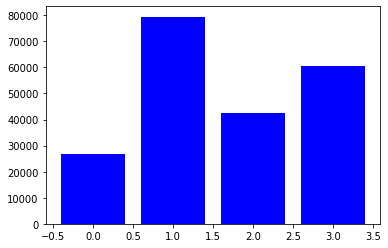

In [37]:
# outer, top, bottom, onepiece
label_list = [0,1,2,3] 

plt.bar(label_list, train_list, color='b')
#plt.bar(label_list, val_list, color='r')
#plt.bar(label_list, test_list, color='g')
plt.show()

In [38]:
#train_df.to_csv('train.txt', header=None, index=False, sep=' ', mode='w')
#val_df.to_csv('val.txt', header=None, index=False, sep=' ', mode='w')
#test_df.to_csv('test.txt', header=None, index=False, sep=' ', mode='w')

In [42]:
train_df = train_df.reset_index()
train_df = train_df.drop(labels='index',axis=1)
val_df = val_df.reset_index()
val_df = val_df.drop(labels='index',axis=1)
test_df = test_df.reset_index()
test_df = test_df.drop(labels='index',axis=1)

## txt file

In [48]:
dst = '/home/piclick/data/deepfashion/images/'
datatypelist = ['train','val','test']
dflist = [train_df,val_df,test_df]

txtfilelist=[]

for datatype,df in zip(datatypelist,dflist):
    for ind, row in df.iterrows():
        newfilename = row['img_path'].split('/')[-2] +'_'+ row['img_path'].split('/')[-1]
        
        with open(datatype +'.txt', 'a') as f:
            f.write(dst + datatype+ '/' + newfilename + '\n')

In [49]:
filenames = ['train.txt', 'val.txt']

with open('trainval.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            outfile.write(infile.read())

## 이미지 카피

In [43]:
import os
import glob
import json
from shutil import copyfile

In [44]:
dst = '/home/piclick/data/deepfashion/images/'
datatypelist = ['train','val','test']
dflist = [train_df,val_df,test_df]

for datatype,df in zip(datatypelist,dflist):
    for ind, row in df.iterrows():
        newfilename = row['img_path'].split('/')[-2] +'_'+ row['img_path'].split('/')[-1]

        copyfile(row['img_path'], dst + datatype+ '/' + newfilename)

## 라벨 생성

In [ ]:
dst = '/home/piclick/data/deepfashion/labels/'
datatypelist = ['train','val','test']
dflist = [train_df,val_df,test_df]

for datatype,df in zip(datatypelist,dflist):
    for ind, row in df.iterrows():
        newfilename = row['img_path'].split('/')[-2] +'_'+ row['img_path'].split('/')[-1].replace('.jpg','.txt')
    
        with open(dst+datatype+'/'+datatype+'_'+ newfilename, 'w') as f:
            f.write('{} {} {} {} {}'.format(row['label'],
                                            row['cx_norm'],
                                            row['cy_norm'],
                                            row['box_width_norm'],
                                            row['box_height_norm']
                                           ))
